# Graduate Rotational Internship

# The sparks Foundation

**Github link- github.com/AditiMondal1110**

**Task No-4.Explotory data analysis-Global Teririsam**

**Author-Aditi Mondal**

**Aim:**

**.Perform 'Explotary Data Analysis' on dataset 'Global Terrorism'**

**.As a security/defense analyst,try to find out the hot zone of terrorism.**

**.What all security issues and insights we can derive by EDA ?**






# Importing all the neccessary libraries,

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [68]:
df=pd.read_csv(r"C:\Users\HP\data\New folder\New folder\globalterrorismdb_0718dist.csv")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [69]:
df.shape

(181691, 135)

In [70]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [71]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                   'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                   'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type'
                   ,'motive':'Motive'},inplace=True)

In [72]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
       'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [73]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [74]:
df.shape

(181691, 18)

In [75]:
df.head(2).T

,0,1
Year,1970,1970
Month,7,0
Day,2,0
Country,Dominican Republic,Mexico
state,NaN,Federal
Region,Central America & Caribbean,North America
city,Santo Domingo,Mexico city
latitude,18.456792,19.371887
longitude,-69.951164,-99.086624
AttackType,Assassination,Hostage Taking (Kidnapping)


# Any Missing Values

In [76]:
df.isnull().sum()/len(df)*100

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
state           0.231712
Region          0.000000
city            0.238867
latitude        2.507554
longitude       2.508104
AttackType      0.000000
Killed          5.676120
Wounded         8.977330
Target          0.350045
Summary        36.396409
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         72.171984
dtype: float64

In [77]:
df=df.drop(['Motive','Summary'],axis=1)

In [78]:
df.shape

(181691, 16)

# Explotary Data Analysis
**1.Country**.
**Top countries affected by Terror attacks**

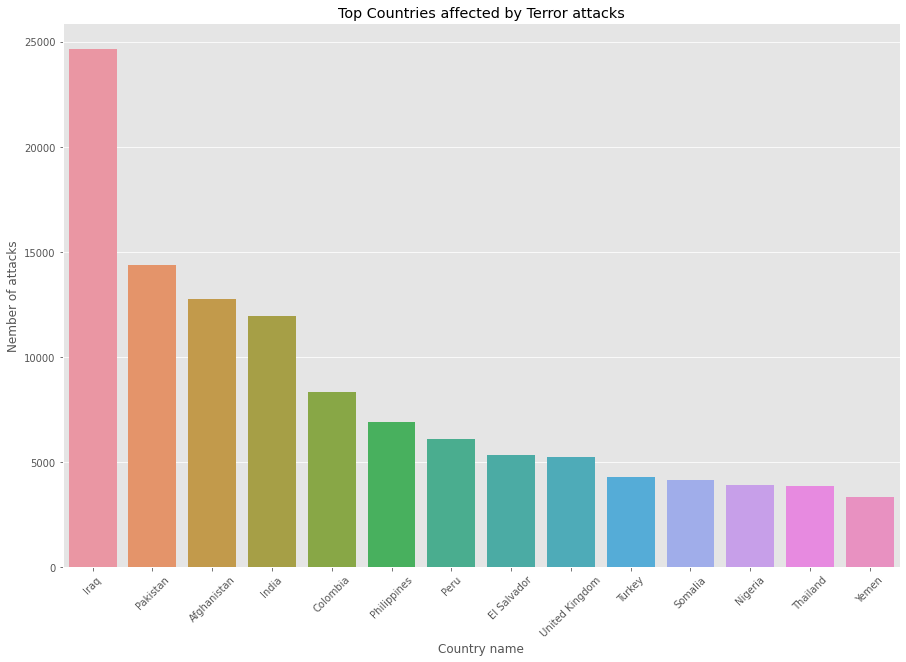

In [79]:
plt.figure(figsize=(15,10))
country =df['Country'].value_counts().reset_index()
sns.barplot(x='index',y='Country',data=country[:14])
plt.title('Top Countries affected by Terror attacks')
plt.xlabel('Country name')
plt.ylabel('Nember of attacks')
plt.xticks(rotation=45)
plt.show()

**2.City**

**Top Cities affected by Terror attacks**


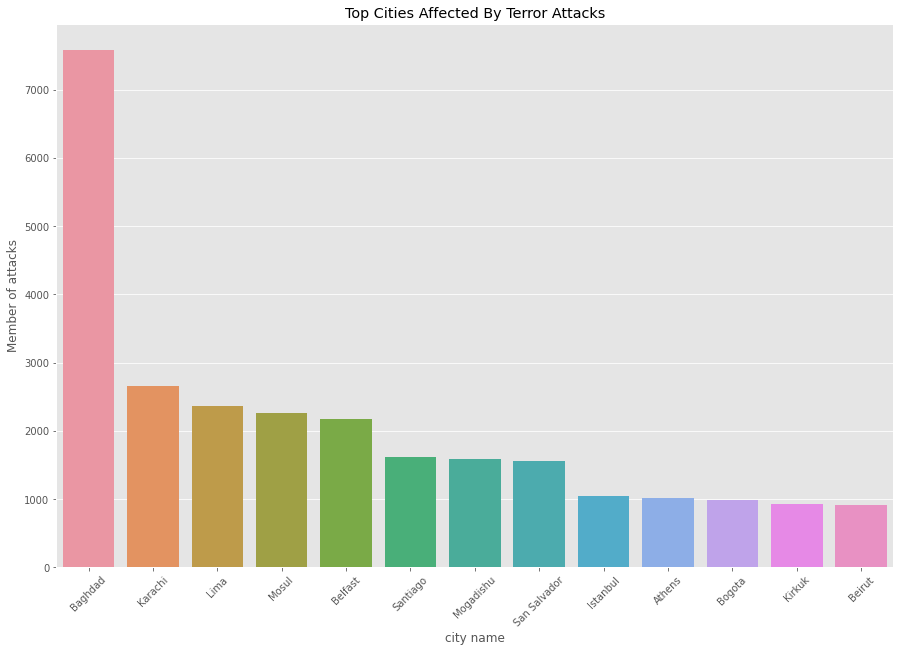

In [80]:
city=df['city'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='index',y='city',data=city[1:14])
plt.title('Top Cities Affected By Terror Attacks')
plt.xlabel('city name')
plt.ylabel('Member of attacks')
plt.xticks(rotation=45)
plt.show()

**Percentage of occured attaacks by country**

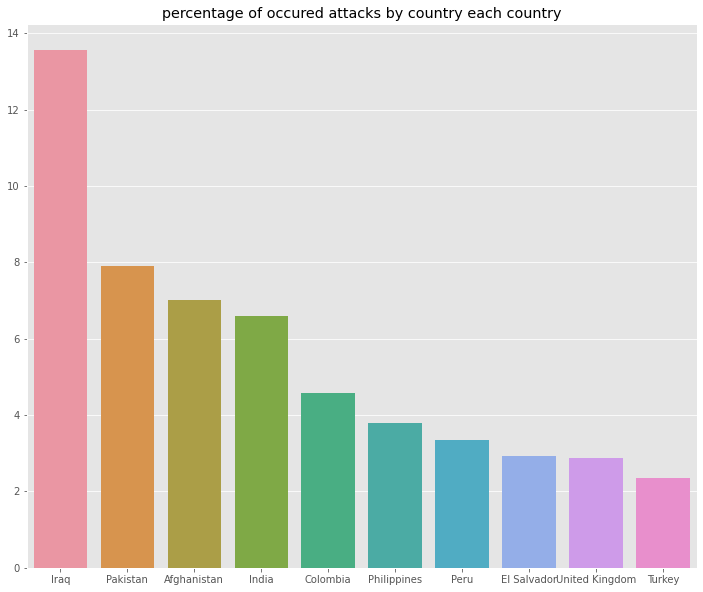

In [83]:
pers_attack=df['Country'].value_counts()/len(df['Country'])*100
plt.figure(figsize=(12,10))
sns.barplot(x=pers_attack[:10].index,y=pers_attack[:10].values)
#per_attack [:10].plot(kind='bar')
plt.title('percentage of occured attacks by country each country')
plt.show()

 **3.Region**
**Terrorist Activist by region**

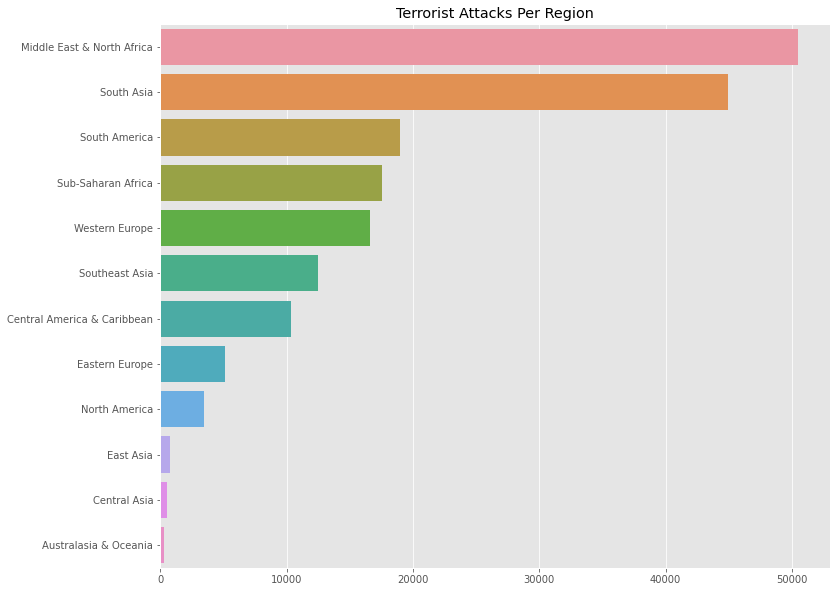

In [84]:
plt.figure(figsize=(12,10))
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index)
plt.title('Terrorist Attacks Per Region')
plt.show()

**Terrorist activites by region year wise**


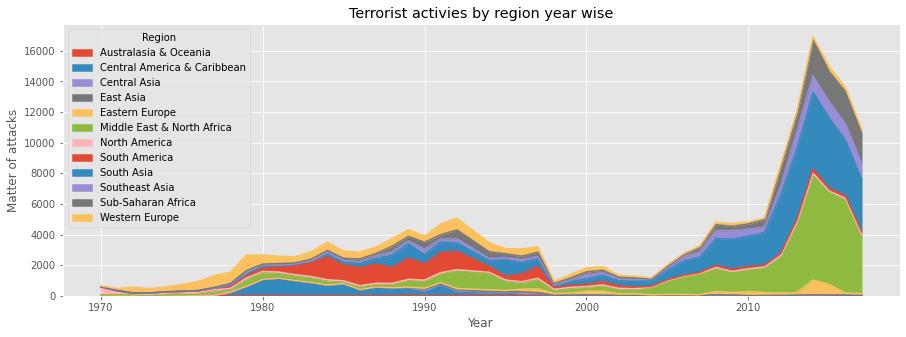

In [85]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(15,5))
plt.title('Terrorist activies by region year wise')
plt.ylabel('Matter of attacks')
plt.show()

# **4.Year**
**Terrorist Attacks in each year**

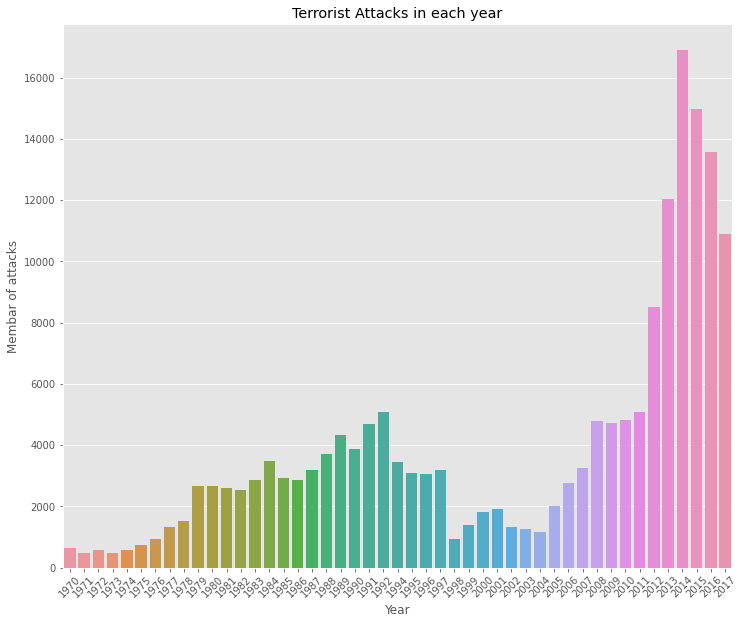

In [89]:
plt.figure(figsize=(12,10))
sns.countplot(df['Year'])
plt.xticks(rotation=45)
plt.title('Terrorist Attacks in each year')
plt.ylabel('Membar of attacks')
#plt.grid()
plt.show()

# **5.People were killeed in Terror attack**
**People were killed in a Terrorist attack in each year**

In [98]:
Killed=df.groupby('Year').sum()['Killed'].reset_index()
year=df.groupby('Year').size()
year=pd.DataFrame({'Attack':year})
year=year.reset_index()
Killed=Killed.drop(['Year'],axis=1)
new_year=pd.concat([year,Killed],axis=1)

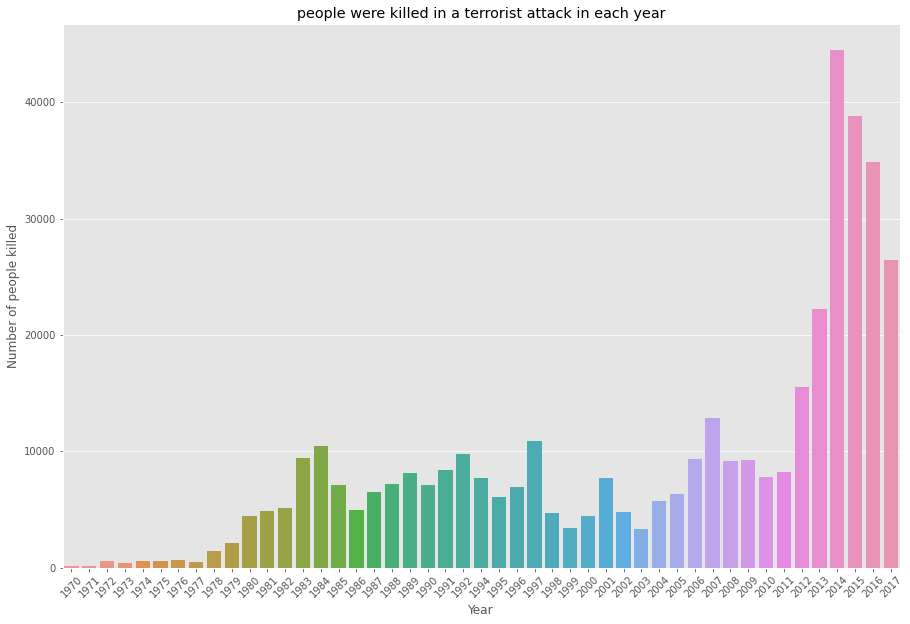

In [101]:
plt.figure(figsize=(15,10))
sns.barplot(data= new_year,x='Year',y='Killed')
plt.xticks(rotation=45)
plt.title('people were killed in a terrorist attack in each year')
plt.ylabel('Number of people killed')
plt.xlabel('Year')
plt.show()

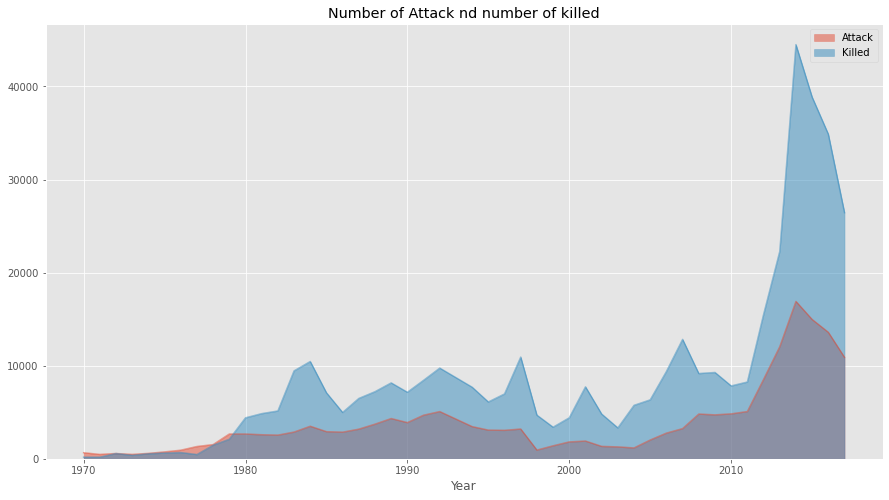

In [103]:
new_year.plot.area(stacked=False,x='Year',figsize=(15,8));
plt.title('Number of Attack nd number of killed')
#plt.grid()
plt.show()


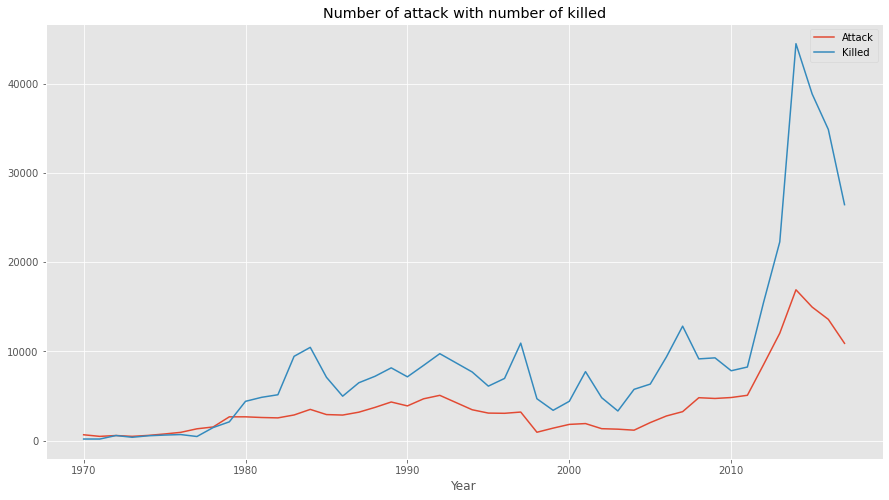

In [105]:
new_year.plot(x='Year',figsize=(15,8))
plt.title('Number of attack with number of killed')
plt.show()

**6.Diffrent types of attack_type**

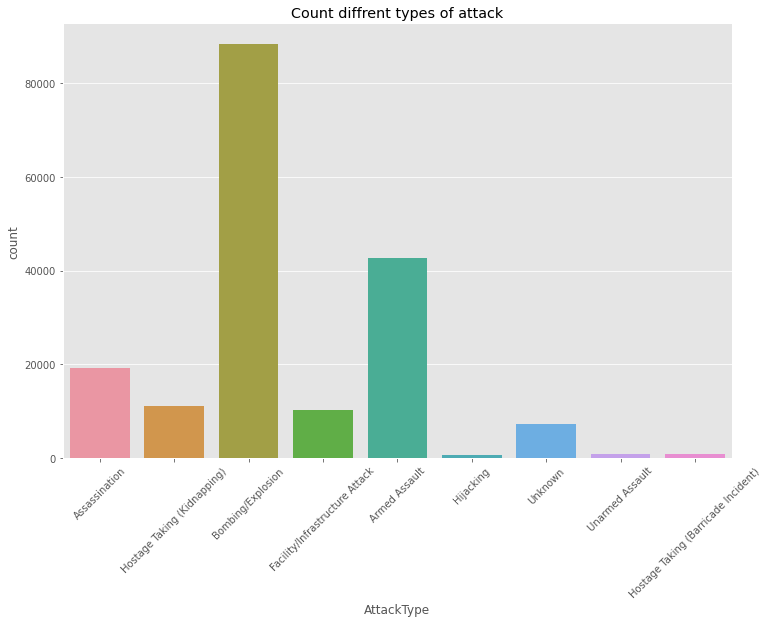

In [106]:
plt.figure(figsize=(12,8))
sns.countplot(df['AttackType'])
plt.title('Count diffrent types of attack')
plt.xticks(rotation=45)
plt.show()

# Different type of attack in each year


In [111]:
attack_type=df['AttackType'].value_counts().reset_index()
attack_type=attack_type.rename(columns={'index':'Attack type','AttackType':'Attck'})



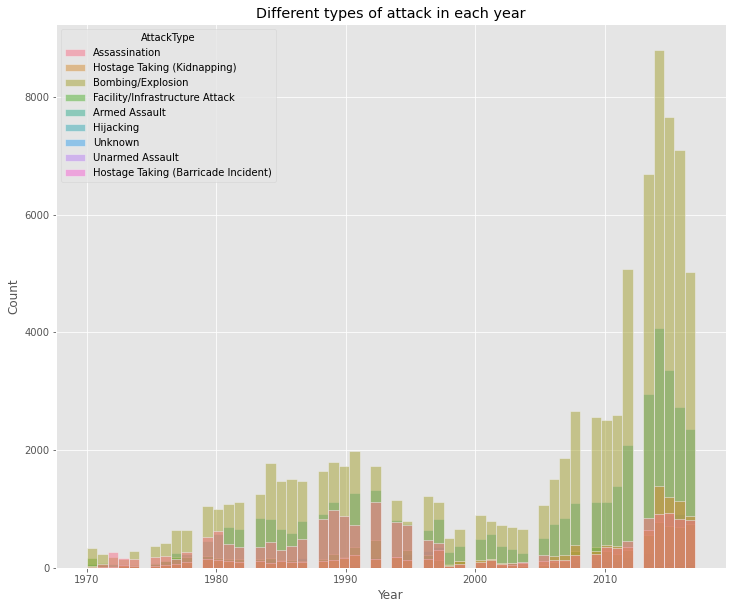

In [115]:
plt.figure(figsize=(12,10))
sns.histplot(x='Year',data=df,hue='AttackType')
plt.title('Different types of attack in each year')
plt.show()

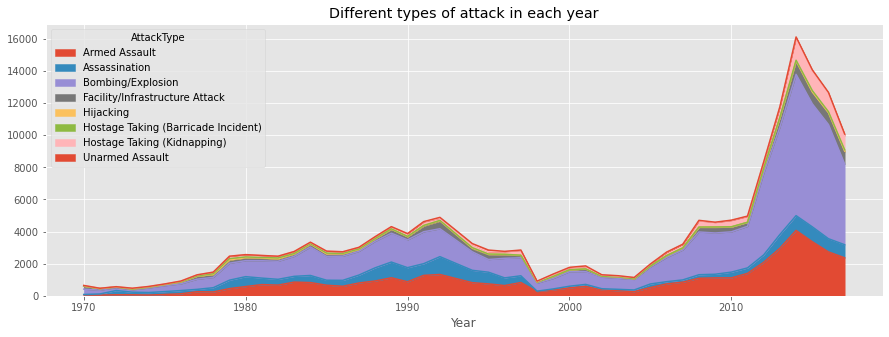

In [124]:
attack_df=df[df['AttackType']!='Unknown']
pd.crosstab(attack_df.Year,attack_df.AttackType).plot(kind='area',figsize=(15,5))
plt.title('Different types of attack in each year')
plt.show()

**7.Different type of target**

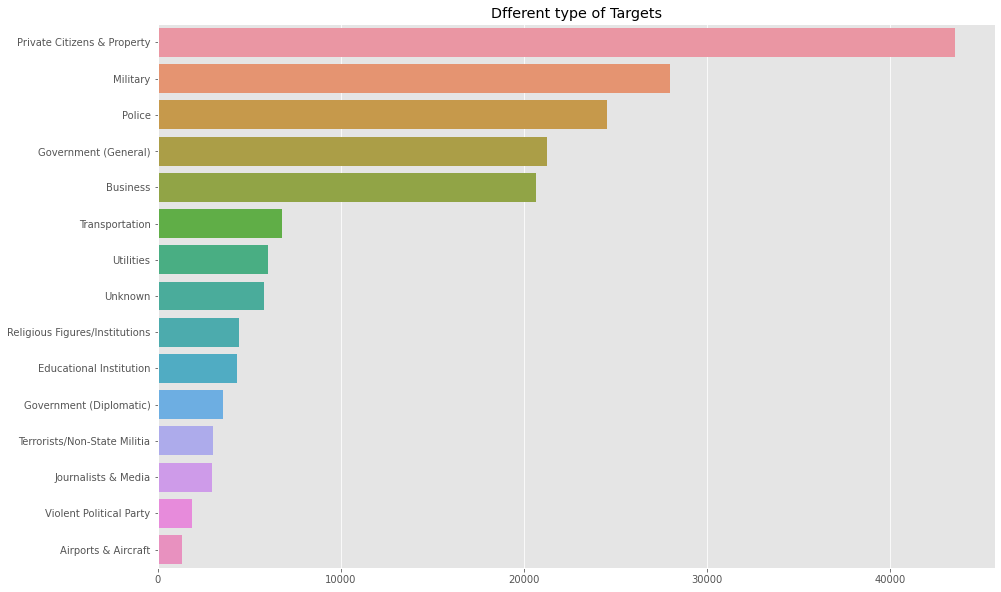

In [128]:
plt.figure(figsize=(15,10))
new_df=df[df['Target']!='unknown']
sns.barplot(y=new_df['Target_type'].value_counts()[:15].index,x=new_df['Target_type'].value_counts()[:15].values)
plt.title('Dfferent type of Targets')

plt.show()

**Most activist Terrorist attack**


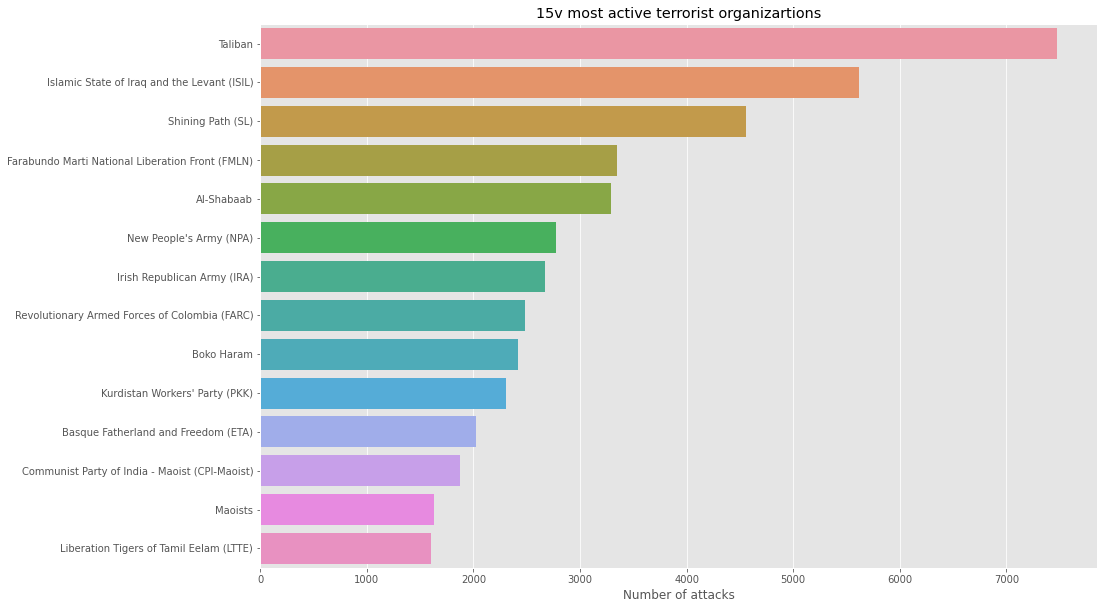

In [132]:
plt.figure(figsize=(15,10))
sns.barplot(y=df['Group'].value_counts()[1:15].index,x=df['Group'].value_counts()[1:15].values)
plt.title('15v most active terrorist organizartions')
plt.xlabel('Number of attacks')
plt.show()

# comclusion

**Top three countries affected by Terror attack**

**1.Iraq**

**2.Pakistan**

**3.Afganistan**

**2.Top 3 cities affected by Terror Attacks**

**1.Baghdad**

**2.Karachi**

**3.Lima**

**3.Top 3 Regions affected by Terror Attacks**

**1.Middle East and  North Africa**

**2.South Asia**

**3.South Asian**

**4.Most number of Terror attack:year 2014**

**5.Anotherv country has affected by the minimum number of Terror attack**

**6.Major Target TYpe**

**1private cityzen and property**

**2.Military**

**3.police**

**7.Most active Terrorist Organization**

**1.Taliban**

**2.Islamic State of iraq and the Levant(ISIL)

**3.Shining Path(SL)**




